# Hackaton 2019: Detect a line from a drone

Libraries and load image

In [ ]:
import cv2 as cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import image as mp_image
from PIL import Image, ImageFilter
from imutils import perspective
import math

os.environ["ENABLE_CV2_IMSHOW"] = 'true'
image_file = "line2.jpg"
image = mp_image.imread(image_file)
plt.imshow(image)
plt.show()


Detect the line and print the direction

43.00821004034855


True

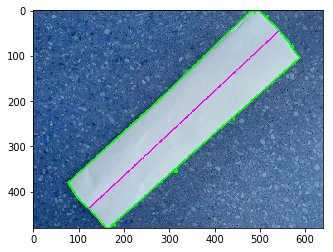

In [ ]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
def distance(p0, p1): 
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

im = cv2.imread('line2.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



area=0
for i in range(len(contours)):
  if cv2.contourArea(contours[i]) > area:
    area = cv2.contourArea(contours[i])
    arg= i

rect = cv2.minAreaRect(contours[arg])
box = cv2.boxPoints(rect)
box = np.int0(box)
box = perspective.order_points(box)



(tl, tr, br, bl) = box
(tltrX, tltrY) = midpoint(tl, tr)
(blbrX, blbrY) = midpoint(bl, br)

(tlblX, tlblY) = midpoint(tl, bl)
(trbrX, trbrY) = midpoint(tr, br)

horizontal_distance = distance(midpoint(tl, bl), midpoint(tr, br))
vertical_distance = distance(midpoint(tl, tr), midpoint(bl, br))

if vertical_distance >= horizontal_distance:
  cv2.line(im, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
        (255, 0, 255), 2)
  theta= math.atan2(tltrY - blbrY, tltrX - blbrX)*360/(2*math.pi)
  
else:  
  cv2.line(im, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
        (255, 0, 255), 2)
  theta= math.atan2(tlblY - trbrY, trbrX - tlblX)*360/(2*math.pi)

print(theta)


cv2.drawContours(im, contours, arg, (0,255,0), 3)
#cv2.drawContours(im, contours, -1, (0,255,0), 3)
#cv2.drawContours(im, [box], 0, (0,255,0), 3)

plt.imshow(im)
cv2.imwrite("lines2_detected.jpg", im)

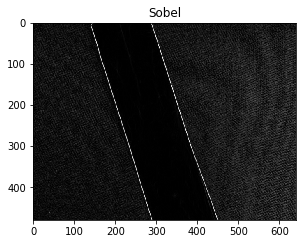

In [ ]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

sobel_image = edge_sobel(np.array(image))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot Sobel image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

plt.show()

In [ ]:
# Convert the image to gray-scale
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(im, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
cv2.imshow("Result Image", im)